<a href="https://colab.research.google.com/github/EdwinSarmiento/Clase_IA/blob/main/Colab_ImportsOnly_20Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 20 Newsgroups — Clasificación (TF‑IDF + LinearSVC) — **Imports only** (Colab/Jupyter)



## 1) Cargar dataset y vectorizar (TF‑IDF)

In [1]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 4 categorías claras
categories = ['rec.sport.baseball', 'sci.electronics', 'comp.graphics', 'talk.politics.misc']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'))

X, y = data.data, data.target
target_names = data.target_names

# Vectorización TF-IDF con stopwords de sklearn
vectorizer = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(1,2))
Xvec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    Xvec, y, test_size=0.2, random_state=42, stratify=y
)

len(X), target_names, Xvec.shape


(2237,
 ['comp.graphics',
  'rec.sport.baseball',
  'sci.electronics',
  'talk.politics.misc'],
 (2237, 11576))

## 2) Entrenar y evaluar (LinearSVC)

In [2]:

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Predicción para TODO el conjunto cargado
y_all = clf.predict(Xvec)
df_resultados = pd.DataFrame({
    "texto_preview": [t[:200].replace("\n"," ")+"..." for t in X],
    "label_real":   [target_names[i] for i in y],
    "label_pred":   [target_names[i] for i in y_all],
})
df_resultados.head(10)


Accuracy: 0.9084821428571429

Classification report:
                     precision    recall  f1-score   support

     comp.graphics       0.93      0.88      0.90       117
rec.sport.baseball       0.86      0.97      0.91       120
   sci.electronics       0.91      0.90      0.91       118
talk.politics.misc       0.95      0.88      0.92        93

          accuracy                           0.91       448
         macro avg       0.91      0.91      0.91       448
      weighted avg       0.91      0.91      0.91       448


Confusion matrix:
 [[103   5   6   3]
 [  1 116   2   1]
 [  6   6 106   0]
 [  1   8   2  82]]


,texto_preview,label_real,label_pred
0,"Um, what? Eddie Murray was a superb firs...",rec.sport.baseball,rec.sport.baseball
1,What hardware do plan to run on? Workstation ...,comp.graphics,comp.graphics
2,This is why I asked to be 'enlightened'. You...,talk.politics.misc,talk.politics.misc
3,An addition to anti-discrimination laws w...,talk.politics.misc,talk.politics.misc
4,Actually the reasons you don't see so many c...,sci.electronics,sci.electronics
5,Does anyone know if the Twins games are broadc...,rec.sport.baseball,rec.sport.baseball
6,"Hi there!... \t\tWell, i have a 386/40 with SV...",comp.graphics,comp.graphics
7,No. No. NOOO!!! The ground (green) wire is...,sci.electronics,sci.electronics
8,# ##So tell me---what's immoral about homosexu...,talk.politics.misc,talk.politics.misc
9,"[purile babble deleted] Well, some form of gu...",talk.politics.misc,talk.politics.misc


### (Opcional) Matriz de confusión (gráfico)

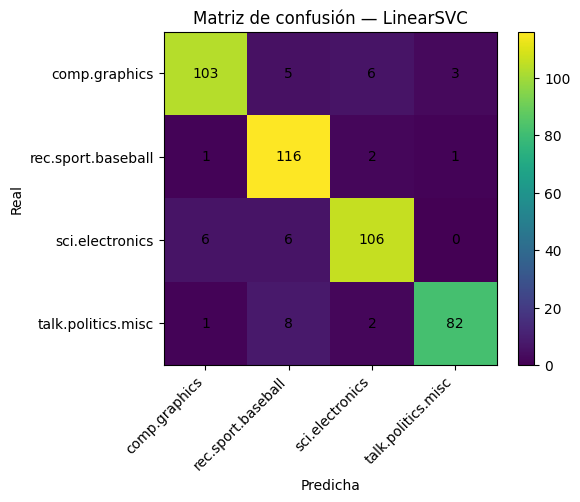

In [3]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title('Matriz de confusión — LinearSVC')
plt.colorbar()
tick_marks = range(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45, ha='right')
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicha')
plt.ylabel('Real')

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


## 3) Exportar a CSV (y descargar en Colab)

In [4]:

df_resultados.to_csv("clasificacion_20newsgroups_svm.csv", index=False)
print("Archivo guardado: clasificacion_20newsgroups_svm.csv")

try:
    from google.colab import files
    files.download("clasificacion_20newsgroups_svm.csv")
except Exception:
    pass


Archivo guardado: clasificacion_20newsgroups_svm.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>